In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('breast_cancer.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

In [6]:
df.columns = ['Code_No','Thickness','Cell_Size','Cell_Shape','Adhesion','Ept_Cell_Size',
             'Nuclei','Chromatin','Nucleoli','Mitoses','Class']
df.head()

,Code_No,Thickness,Cell_Size,Cell_Shape,Adhesion,Ept_Cell_Size,Nuclei,Chromatin,Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [7]:

# #  Attribute                     Domain
#    -- -----------------------------------------
#    1. Sample code number            id number
#    2. Clump Thickness               1 - 10
#    3. Uniformity of Cell Size       1 - 10
#    4. Uniformity of Cell Shape      1 - 10
#    5. Marginal Adhesion             1 - 10
#    6. Single Epithelial Cell Size   1 - 10
#    7. Bare Nuclei                   1 - 10
#    8. Bland Chromatin               1 - 10
#    9. Normal Nucleoli               1 - 10
#   10. Mitoses                       1 - 10
#   11. Class:                        (2 for benign, 4 for malignant)


In [8]:
df.isnull().sum()

Code_No          0
Thickness        0
Cell_Size        0
Cell_Shape       0
Adhesion         0
Ept_Cell_Size    0
Nuclei           0
Chromatin        0
Nucleoli         0
Mitoses          0
Class            0
dtype: int64

In [9]:
df.dtypes

Code_No           int64
Thickness         int64
Cell_Size         int64
Cell_Shape        int64
Adhesion          int64
Ept_Cell_Size     int64
Nuclei           object
Chromatin         int64
Nucleoli          int64
Mitoses           int64
Class             int64
dtype: object

In [10]:
d1 = df['Class'].value_counts()
d1
# 2 - Benign
# 4 - Malignant

2    458
4    241
Name: Class, dtype: int64

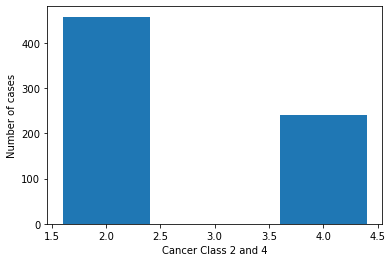

In [11]:
plt.bar(d1.index,d1)
plt.xlabel('Cancer Class 2 and 4')
plt.ylabel('Number of cases')
plt.show()

In [12]:
df['Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Nuclei, dtype: int64

In [13]:
df['Nuclei'] = df['Nuclei'].replace('?',1)
df['Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
1      16
9       9
7       8
6       4
Name: Nuclei, dtype: int64

In [14]:
df.dtypes

Code_No           int64
Thickness         int64
Cell_Size         int64
Cell_Shape        int64
Adhesion          int64
Ept_Cell_Size     int64
Nuclei           object
Chromatin         int64
Nucleoli          int64
Mitoses           int64
Class             int64
dtype: object

In [15]:
df['Nuclei'] = pd.to_numeric(df['Nuclei'])
df.dtypes

Code_No          int64
Thickness        int64
Cell_Size        int64
Cell_Shape       int64
Adhesion         int64
Ept_Cell_Size    int64
Nuclei           int64
Chromatin        int64
Nucleoli         int64
Mitoses          int64
Class            int64
dtype: object

In [16]:
df['Nuclei'].value_counts()

1     418
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Nuclei, dtype: int64

In [17]:
df.dtypes

Code_No          int64
Thickness        int64
Cell_Size        int64
Cell_Shape       int64
Adhesion         int64
Ept_Cell_Size    int64
Nuclei           int64
Chromatin        int64
Nucleoli         int64
Mitoses          int64
Class            int64
dtype: object

### Model - 1

In [18]:
x = df.iloc[:,1:-1]
y = df.iloc[:,-1]
print(x.shape,y.shape)
print(type(x),type(y))

(699, 9) (699,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [19]:
x.head()

,Thickness,Cell_Size,Cell_Shape,Adhesion,Ept_Cell_Size,Nuclei,Chromatin,Nucleoli,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [20]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(524, 9)
(175, 9)
(524,)
(175,)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [24]:
from sklearn.metrics import confusion_matrix,classification_report

In [25]:
def apply_model(model):
    model.fit(x_tr,y_tr)
    print('Accuracy',model.score(x_te,y_te))
    ypred = model.predict(x_te)
    print('Predicted values\n',ypred)
    cm = confusion_matrix(y_te,ypred)
    print('Confusion Matrix\n',cm)
    sns.heatmap(cm,annot=True)
    plt.show()
    print('Classification report\n',classification_report(y_te,ypred))

Accuracy 0.9714285714285714
Predicted values
 [2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 2 4 2 4
 2 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 4 2 4 4 4 4 2 4
 4 4 2 2 2 2 2 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2
 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 4 4 2 4 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 2 4 4 4 4 2 4 2 4 2 2 4 4 2 4 2 2 2 4 2 2]
Confusion Matrix
 [[110   4]
 [  1  60]]


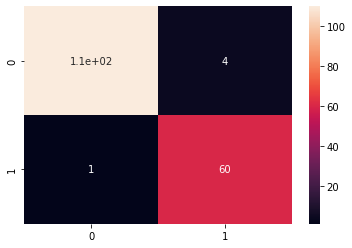

Classification report
               precision    recall  f1-score   support

           2       0.99      0.96      0.98       114
           4       0.94      0.98      0.96        61

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



In [26]:
# 1) LogReg
m1 = LogisticRegression()
apply_model(m1)

Accuracy 0.9485714285714286
Predicted values
 [2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 2 4 2 4
 2 2 2 4 2 2 2 2 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 4 4 2 4
 4 4 2 2 2 2 2 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2
 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 4 4 2 4 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 2 4 4 4 4 2 2 2 4 2 2 4 4 2 4 2 2 2 4 2 2]
Confusion Matrix
 [[110   4]
 [  5  56]]


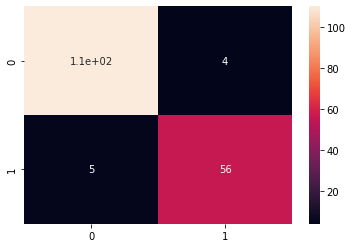

Classification report
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       114
           4       0.93      0.92      0.93        61

    accuracy                           0.95       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175



In [27]:
# 2) Decision Tree
m2 = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m2)

Accuracy 0.9657142857142857
Predicted values
 [2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 2 4 2 4
 2 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 4 2 4 4 4 4 2 4
 4 4 2 2 2 2 2 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2
 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 4 4 2 4 4 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 2 4 2 4 4 2 4 2 4 2 2 4 4 2 4 2 2 2 4 2 2]
Confusion Matrix
 [[110   4]
 [  2  59]]


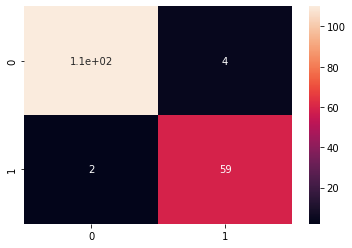

Classification report
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       114
           4       0.94      0.97      0.95        61

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



In [28]:
# 3) Random Forest
m3 = RandomForestClassifier(n_estimators=70,criterion='gini',max_depth=5,min_samples_split=10)
apply_model(m3)

Accuracy 0.9657142857142857
Predicted values
 [2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 2 4 2 4
 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 4 2 4 4 4 4 2 4
 4 4 2 2 2 2 2 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2
 2 2 2 2 4 4 2 2 2 2 4 2 2 4 2 4 4 2 4 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 2 4 4 4 4 2 4 2 4 2 2 4 4 2 4 2 2 2 4 2 2]
Confusion Matrix
 [[110   4]
 [  2  59]]


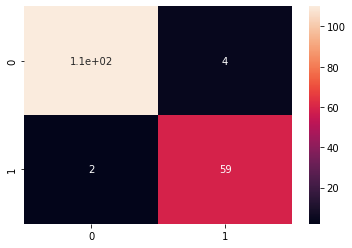

Classification report
               precision    recall  f1-score   support

           2       0.98      0.96      0.97       114
           4       0.94      0.97      0.95        61

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.96       175
weighted avg       0.97      0.97      0.97       175



In [29]:
# 4) SVC
m4 = SVC(kernel='linear',C=1)
apply_model(m4)

Accuracy 0.9714285714285714
Predicted values
 [2 4 2 2 4 2 4 2 4 2 4 2 4 2 4 2 2 4 2 2 2 4 4 2 4 2 2 4 4 4 2 2 2 2 4 2 4
 2 2 2 4 2 2 4 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 2 2 4 2 2 4 2 4 4 4 4 2 4
 4 4 2 2 2 2 2 4 4 4 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 2 4 2 2 2
 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 4 4 2 4 4 2 2 2 2 4 2 2 2 4 2 4 2 2 2 2 4 2
 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 4 4 2 4 2 2 2 4 2 2]
Confusion Matrix
 [[111   3]
 [  2  59]]


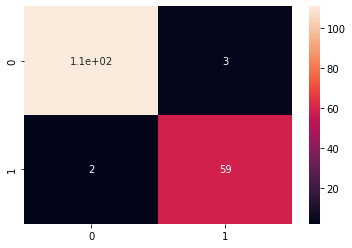

Classification report
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       114
           4       0.95      0.97      0.96        61

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



In [30]:
# 5) KNN
m5 = KNeighborsClassifier(n_neighbors=27)
apply_model(m5)

### Model-2 Feature Selection using Correlation

In [31]:
df.corr()

,Code_No,Thickness,Cell_Size,Cell_Shape,Adhesion,Ept_Cell_Size,Nuclei,Chromatin,Nucleoli,Mitoses,Class
Code_No,1.000000,-0.055308,-0.041603,-0.041576,-0.064878,-0.045528,-0.092533,-0.060051,-0.052072,-0.034901,-0.080226
Thickness,-0.055308,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Cell_Size,-0.041603,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Cell_Shape,-0.041576,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Adhesion,-0.064878,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Ept_Cell_Size,-0.045528,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Nuclei,-0.092533,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Chromatin,-0.060051,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Nucleoli,-0.052072,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,-0.034901,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170


In [32]:
df.corr()['Class']

Code_No         -0.080226
Thickness        0.716001
Cell_Size        0.817904
Cell_Shape       0.818934
Adhesion         0.696800
Ept_Cell_Size    0.682785
Nuclei           0.818968
Chromatin        0.756616
Nucleoli         0.712244
Mitoses          0.423170
Class            1.000000
Name: Class, dtype: float64

In [33]:
#### Correlation Therhold = 0.70

In [34]:
x = df.iloc[:,[1,2,3,6,7,8]]
y = df.iloc[:,-1]
print(x.shape,y.shape)
print(type(x),type(y))

(699, 6) (699,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [35]:
x.head()

,Thickness,Cell_Size,Cell_Shape,Nuclei,Chromatin,Nucleoli
0,5,1,1,1,3,1
1,5,4,4,10,3,2
2,3,1,1,2,3,1
3,6,8,8,4,3,7
4,4,1,1,1,3,1


In [36]:
y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

In [37]:
x_tr,x_te,y_tr,y_te = train_test_split(x,y,test_size=0.25)
print(x_tr.shape)
print(x_te.shape)
print(y_tr.shape)
print(y_te.shape)

(524, 6)
(175, 6)
(524,)
(175,)


Accuracy 0.9657142857142857
Predicted values
 [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2
 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 4
 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 4 2 2 4 4 4 4 2 4 4 2 2
 4 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2]
Confusion Matrix
 [[111   3]
 [  3  58]]


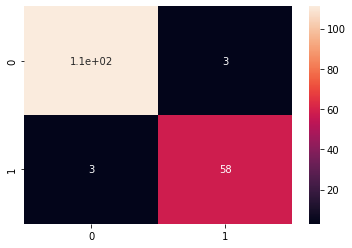

Classification report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       114
           4       0.95      0.95      0.95        61

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175



In [38]:
m6 = LogisticRegression()
apply_model(m6)

Accuracy 0.9485714285714286
Predicted values
 [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 4 2 4 2 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2
 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 4 2 2 2 2 2 2 4 4 4 4 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 2 2 4 2 2 4 4 4 4 2 4 4 2 2
 4 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 2 4 2 4 2 4 2]
Confusion Matrix
 [[110   4]
 [  5  56]]


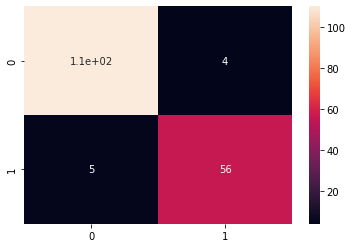

Classification report
               precision    recall  f1-score   support

           2       0.96      0.96      0.96       114
           4       0.93      0.92      0.93        61

    accuracy                           0.95       175
   macro avg       0.94      0.94      0.94       175
weighted avg       0.95      0.95      0.95       175



In [39]:
m7 = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=9)
apply_model(m7)

Accuracy 0.9771428571428571
Predicted values
 [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4 2 4 4 4
 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 4
 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 4 2 2 4 4 4 4 2 4 4 2 2
 4 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 2 4 2 4 2 4 2]
Confusion Matrix
 [[111   3]
 [  1  60]]


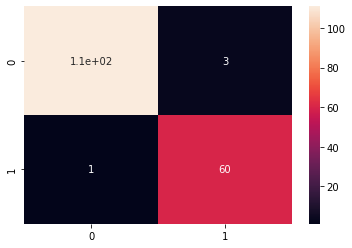

Classification report
               precision    recall  f1-score   support

           2       0.99      0.97      0.98       114
           4       0.95      0.98      0.97        61

    accuracy                           0.98       175
   macro avg       0.97      0.98      0.98       175
weighted avg       0.98      0.98      0.98       175



In [40]:
m8 = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=7,min_samples_split=15)
apply_model(m8)

Accuracy 0.9714285714285714
Predicted values
 [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4 2 4 4 4
 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 4 4 4 4 2 2 4 2 4 4
 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 4 2 2 4 4 4 4 2 4 4 2 2
 4 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2]
Confusion Matrix
 [[111   3]
 [  2  59]]


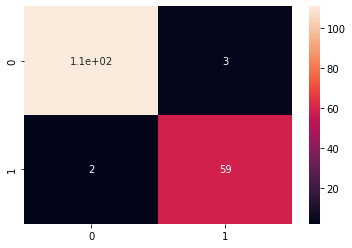

Classification report
               precision    recall  f1-score   support

           2       0.98      0.97      0.98       114
           4       0.95      0.97      0.96        61

    accuracy                           0.97       175
   macro avg       0.97      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



In [41]:
m9 = SVC(kernel='linear',C=0.01)
apply_model(m9)

Accuracy 0.96
Predicted values
 [2 2 4 2 4 2 4 2 4 2 4 4 2 4 2 4 2 4 2 2 4 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4
 2 4 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2
 2 2 2 4 2 4 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 4 4
 2 2 2 2 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 4 4 2 4 2 2 4 4 4 4 2 4 4 2 2
 4 2 2 4 4 2 2 2 2 4 2 2 2 4 2 2 2 2 2 4 2 2 2 4 2 4 2]
Confusion Matrix
 [[111   3]
 [  4  57]]


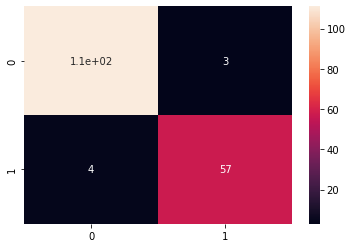

Classification report
               precision    recall  f1-score   support

           2       0.97      0.97      0.97       114
           4       0.95      0.93      0.94        61

    accuracy                           0.96       175
   macro avg       0.96      0.95      0.96       175
weighted avg       0.96      0.96      0.96       175



In [42]:
m10 = KNeighborsClassifier(n_neighbors=37)
apply_model(m10)